In [1]:
!pip install librosa


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('features/Actor_02/03-01-01-01-01-02-02.wav')

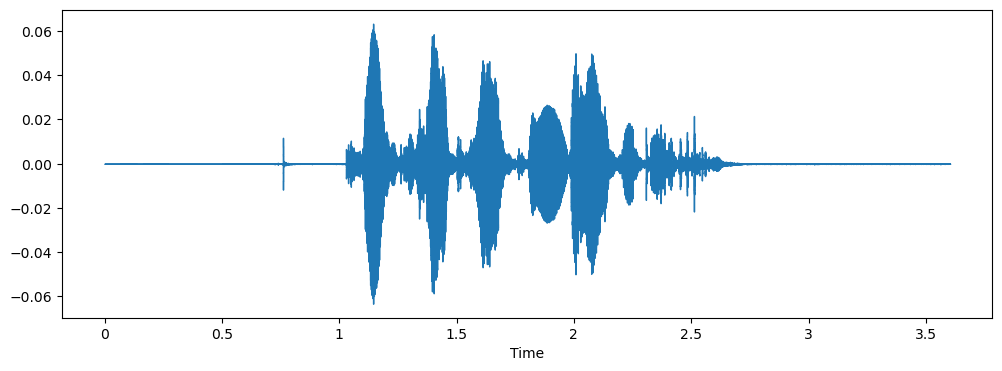

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

In [4]:
import joblib
X = joblib.load('dataset_features/X.joblib')
y = joblib.load('dataset_features/y.joblib')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
predictions = dtree.predict(X_test)
     

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.37      0.45      0.40        58
           1       0.50      0.41      0.45       131
           2       0.43      0.38      0.41       130
           3       0.39      0.42      0.41       126
           4       0.60      0.59      0.59       111
           5       0.45      0.48      0.47       131
           6       0.26      0.34      0.29        56
           7       0.32      0.28      0.30        67

    accuracy                           0.43       810
   macro avg       0.42      0.42      0.42       810
weighted avg       0.44      0.43      0.43       810



In [8]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [9]:
x_traincnn.shape, x_testcnn.shape

((1642, 40, 1), (810, 40, 1))

In [10]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

2024-07-02 20:35:19.572101: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 20:35:19.572742: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 20:35:19.627135: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 20:35:19.918620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 20:35:21.510858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 2, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,672 (819.03 KB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
     

cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1358 - loss: 6.5348 - val_accuracy: 0.1383 - val_loss: 2.1921
Epoch 2/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1388 - loss: 4.2443 - val_accuracy: 0.1691 - val_loss: 2.2010
Epoch 3/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1433 - loss: 3.4680 - val_accuracy: 0.1617 - val_loss: 2.1152
Epoch 4/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1650 - loss: 3.0726 - val_accuracy: 0.2086 - val_loss: 2.0299
Epoch 5/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1953 - loss: 2.6150 - val_accuracy: 0.2457 - val_loss: 1.9109
Epoch 6/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1949 - loss: 2.4771 - val_accuracy: 0.2259 - val_loss: 1.9323
Epoch 7/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2011 - loss: 2.3300 - val_accuracy: 0.2407 - val_loss: 1.8999
Epoch 8/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2076 - loss: 2.1955 - val_acc

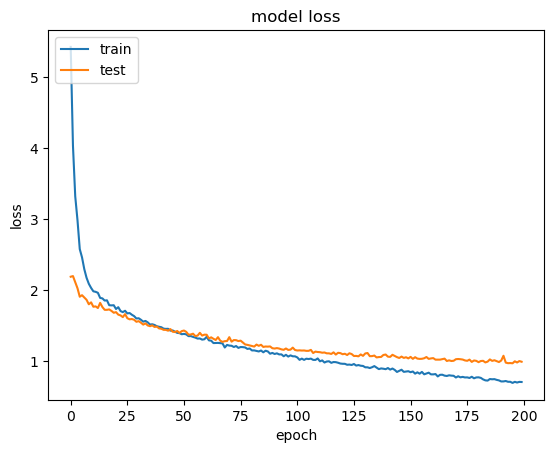

In [13]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

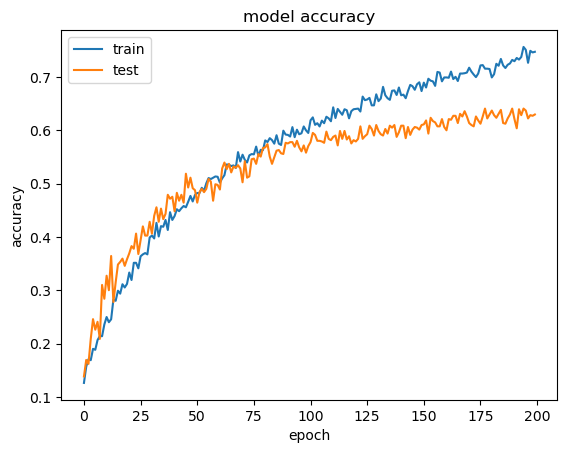

In [14]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
predictions = np.argmax(model.predict(x_testcnn), axis=-1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [16]:
predictions

array([5, 6, 0, 2, 0, 1, 5, 2, 1, 1, 2, 0, 5, 1, 4, 4, 7, 5, 4, 3, 5, 1,
       4, 5, 3, 2, 5, 2, 6, 5, 5, 3, 7, 5, 1, 5, 5, 5, 6, 3, 5, 7, 0, 0,
       2, 5, 4, 2, 3, 5, 1, 5, 1, 5, 6, 4, 0, 1, 5, 2, 7, 3, 2, 2, 0, 4,
       1, 5, 5, 4, 2, 0, 4, 4, 3, 2, 6, 5, 5, 2, 5, 7, 2, 4, 2, 3, 7, 0,
       7, 2, 7, 3, 6, 3, 6, 6, 4, 5, 5, 4, 6, 1, 4, 1, 7, 1, 4, 2, 2, 2,
       5, 4, 1, 1, 2, 3, 3, 0, 0, 4, 3, 2, 2, 3, 5, 7, 1, 4, 5, 3, 3, 4,
       1, 0, 1, 1, 3, 3, 1, 5, 5, 0, 1, 1, 7, 5, 7, 1, 0, 5, 5, 6, 7, 2,
       7, 4, 5, 3, 1, 4, 5, 5, 3, 6, 5, 6, 2, 4, 4, 7, 6, 3, 5, 5, 4, 2,
       1, 6, 4, 5, 4, 7, 2, 3, 7, 0, 7, 1, 4, 7, 5, 0, 1, 5, 7, 1, 4, 2,
       5, 4, 1, 0, 7, 3, 1, 2, 7, 2, 1, 6, 5, 2, 1, 5, 6, 0, 1, 4, 5, 5,
       1, 5, 2, 0, 0, 2, 5, 4, 1, 6, 3, 7, 1, 4, 0, 6, 6, 2, 4, 2, 2, 7,
       5, 3, 1, 1, 5, 2, 2, 2, 5, 1, 4, 1, 5, 4, 0, 1, 0, 3, 0, 5, 5, 5,
       7, 7, 1, 0, 3, 6, 5, 6, 1, 6, 6, 7, 5, 4, 0, 1, 1, 3, 5, 6, 2, 4,
       4, 2, 4, 7, 4, 1, 3, 7, 5, 2, 4, 7, 1, 4, 4,

In [17]:
y_test

array([5, 6, 0, 1, 6, 1, 5, 2, 1, 1, 1, 5, 5, 1, 5, 2, 7, 5, 4, 7, 5, 1,
       4, 2, 3, 7, 2, 1, 6, 5, 1, 3, 7, 5, 1, 3, 3, 5, 4, 3, 5, 7, 3, 6,
       2, 5, 4, 2, 3, 5, 1, 3, 2, 3, 7, 4, 0, 5, 1, 2, 7, 3, 2, 7, 0, 4,
       5, 2, 5, 2, 5, 1, 4, 4, 3, 2, 6, 1, 2, 5, 5, 7, 2, 4, 2, 3, 2, 3,
       4, 2, 5, 3, 6, 3, 2, 4, 6, 7, 5, 4, 1, 2, 4, 1, 1, 1, 4, 4, 2, 2,
       5, 4, 1, 1, 2, 3, 0, 0, 1, 4, 3, 1, 4, 5, 6, 7, 3, 4, 5, 3, 3, 2,
       1, 0, 1, 1, 3, 3, 1, 5, 1, 2, 3, 1, 7, 3, 2, 1, 0, 5, 5, 1, 0, 1,
       2, 4, 5, 3, 1, 4, 2, 2, 3, 6, 5, 4, 2, 2, 4, 7, 2, 3, 5, 5, 4, 2,
       2, 3, 4, 5, 2, 7, 6, 5, 4, 1, 7, 1, 7, 7, 5, 4, 3, 5, 5, 1, 4, 5,
       2, 4, 1, 4, 7, 3, 3, 2, 0, 1, 6, 6, 4, 1, 1, 3, 6, 0, 1, 4, 7, 3,
       1, 5, 2, 0, 0, 2, 5, 7, 1, 6, 3, 6, 1, 4, 0, 6, 6, 5, 4, 2, 2, 7,
       3, 3, 1, 1, 5, 1, 4, 2, 5, 1, 4, 6, 5, 4, 0, 1, 0, 3, 0, 5, 4, 3,
       7, 7, 1, 0, 3, 6, 5, 6, 1, 6, 4, 7, 5, 5, 0, 1, 1, 5, 4, 1, 2, 4,
       7, 1, 3, 3, 4, 1, 6, 7, 5, 4, 4, 6, 1, 4, 4,

In [18]:
new_Ytest = y_test.astype(int)
new_Ytest

array([5, 6, 0, 1, 6, 1, 5, 2, 1, 1, 1, 5, 5, 1, 5, 2, 7, 5, 4, 7, 5, 1,
       4, 2, 3, 7, 2, 1, 6, 5, 1, 3, 7, 5, 1, 3, 3, 5, 4, 3, 5, 7, 3, 6,
       2, 5, 4, 2, 3, 5, 1, 3, 2, 3, 7, 4, 0, 5, 1, 2, 7, 3, 2, 7, 0, 4,
       5, 2, 5, 2, 5, 1, 4, 4, 3, 2, 6, 1, 2, 5, 5, 7, 2, 4, 2, 3, 2, 3,
       4, 2, 5, 3, 6, 3, 2, 4, 6, 7, 5, 4, 1, 2, 4, 1, 1, 1, 4, 4, 2, 2,
       5, 4, 1, 1, 2, 3, 0, 0, 1, 4, 3, 1, 4, 5, 6, 7, 3, 4, 5, 3, 3, 2,
       1, 0, 1, 1, 3, 3, 1, 5, 1, 2, 3, 1, 7, 3, 2, 1, 0, 5, 5, 1, 0, 1,
       2, 4, 5, 3, 1, 4, 2, 2, 3, 6, 5, 4, 2, 2, 4, 7, 2, 3, 5, 5, 4, 2,
       2, 3, 4, 5, 2, 7, 6, 5, 4, 1, 7, 1, 7, 7, 5, 4, 3, 5, 5, 1, 4, 5,
       2, 4, 1, 4, 7, 3, 3, 2, 0, 1, 6, 6, 4, 1, 1, 3, 6, 0, 1, 4, 7, 3,
       1, 5, 2, 0, 0, 2, 5, 7, 1, 6, 3, 6, 1, 4, 0, 6, 6, 5, 4, 2, 2, 7,
       3, 3, 1, 1, 5, 1, 4, 2, 5, 1, 4, 6, 5, 4, 0, 1, 0, 3, 0, 5, 4, 3,
       7, 7, 1, 0, 3, 6, 5, 6, 1, 6, 4, 7, 5, 5, 0, 1, 1, 5, 4, 1, 2, 4,
       7, 1, 3, 3, 4, 1, 6, 7, 5, 4, 4, 6, 1, 4, 4,

In [19]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.66      0.59        58
           1       0.70      0.62      0.66       131
           2       0.66      0.60      0.63       130
           3       0.70      0.51      0.59       126
           4       0.73      0.76      0.74       111
           5       0.58      0.69      0.63       131
           6       0.49      0.61      0.54        56
           7       0.56      0.60      0.58        67

    accuracy                           0.63       810
   macro avg       0.62      0.63      0.62       810
weighted avg       0.64      0.63      0.63       810



In [20]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

[[38  6  1  5  1  1  2  4]
 [13 81 18  3  0  8  7  1]
 [ 3  9 78  2 14 16  2  6]
 [ 6  9  2 64  1 30  9  5]
 [ 4  0  5  0 84  8  6  4]
 [ 1  6  6 11  6 91  4  6]
 [ 4  3  4  3  2  1 34  5]
 [ 2  2  4  3  7  3  6 40]]


In [21]:
model.save('testing10_model.keras')
print("MODEL SAVED")

MODEL SAVED


In [22]:
new_model=keras.models.load_model('testing10_model.keras')
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 2, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,346 (1.60 MB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 209,674 (819.04 KB)

In [23]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6337 - loss: 1.0060 
Restored model, accuracy: 62.96%


In [34]:
import keras
import numpy as np
import librosa

class livePredictions:
    """
    Main class of the application.
    """

    def __init__(self, path, file):
        """
        Init method is used to initialize the main parameters.
        """
        self.path = path
        self.file = file

    def load_model(self):
        """
        Method to load the chosen model.
        :param path: path to your h5 model.
        :return: summary of the model with the .summary() function.
        """
        self.loaded_model = keras.models.load_model(self.path)
        return self.loaded_model.summary()

    def makepredictions(self):
        """
        Method to process the files and create your features.
        """
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=1)
        x = np.expand_dims(x, axis=0)
        predictions = self.loaded_model.predict(x)
        predicted_classes = np.argmax(predictions, axis=1)
        print(predictions)
        print(predicted_classes)
        print("Prediction is", " ", self.convertclasstoemotion(predicted_classes))

    @staticmethod
    def convertclasstoemotion(pred):
        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label
"""
description of the file names in the dataset:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

Audio-only (03)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)

"""
pred = livePredictions(path='testing10_model.keras',file='features/Actor_17/03-01-08-02-02-01-17.wav')

pred.load_model()
pred.makepredictions()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 2, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,346 (1.60 MB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 209,674 (819.04 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
[[0.03904781 0.02628867 0.25405532 0.04066137 0.08413561 0.03028073
  0.1475313  0.3779992 ]]
[7]
Prediction is   surprised
